In [1]:
from salishsea_tools import viz_tools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import xarray as xr
import cmocean.cm as cm
import pandas as pd
import salishsea_tools.river_202108 as rivers

## Import and Resampling

In [2]:
year = 2019
fw_day = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231.nc'.format(year, year))
fw_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231.nc'.format(year, year))
phys_day = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_{}0101_{}1231.nc'.format(year, year))
# vol_day = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d.nc'.format(year, year))
vol_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(year, year))

In [4]:
# fw_day.isel(time=0)['nooksack_river'].sum(axis=0).plot()

In [5]:
# vol_day.isel(time=0)['nooksack_river'].sum(axis=0).plot()

In [3]:
phys_mon = phys_day.resample(time='1M').mean()

In [4]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

# rho_inv = (1/1026)

In [11]:
nrow = 3
ncol = 4

In [12]:
fw_day.depth[4]

<xarray.DataArray 'depth' ()>
array(4.5000706, dtype=float32)
Coordinates:
    depth    float32 4.5
Attributes:
    long_name:      Sea Floor Depth
    standard_name:  sea_floor_depth
    units:          metres
    positive:       down

In [5]:
def plot_field_12_months_slice(idepth, jdepth, p_var, cmap, ds, tmask):
    nrow = 3
    ncol = 4

    fname = '{}_all_domain_subset_daily_i{}_j{}_y{}'.format(p_var, idepth, jdepth, year)
    cmap.set_bad('gray')

    fig, ax = plt.subplots(nrow,ncol, figsize = (8.5, 11), sharex=True, sharey=True)

    for row in np.arange(nrow):
        for col in np.arange(ncol):
            time_idx = row * ncol + col
            salinity = np.ma.masked_array(ds[p_var][time_idx, idepth], mask=tmask[idepth])
            colours = ax[row,col].pcolormesh(salinity, vmin=0, cmap=cmap)
            dtime = pd.to_datetime(ds['time'].values[time_idx])
            ax[row,col].set_title('{} {}'.format(dtime.month_name(), dtime.year))
            viz_tools.set_aspect(ax[row,col]);

    cb = fig.colorbar(colours, ax=ax, label='{} [{}]'.format(p_var, ds[p_var].units))

    plt.savefig('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/monthly_vis/hindcast_auto/mean/{}.png'.format(fname))

In [6]:
def plot_field_12_months_sum(p_var, cmap, ds, tmask):
    nrow = 3
    ncol = 4

    fname = '{}_all_domain_subset_daily_sum_y{}'.format(p_var, year)
    cmap.set_bad('gray')

    fig, ax = plt.subplots(nrow,ncol, figsize = (8.5, 11), sharex=True, sharey=True)

    for row in np.arange(nrow):
        for col in np.arange(ncol):
            time_idx = row * ncol + col
            salinity = np.ma.masked_array(ds[p_var][time_idx].sum(axis=0), mask=tmask[0])
            colours = ax[row,col].pcolormesh(salinity, vmin=0, cmap=cmap)
            dtime = pd.to_datetime(ds['time'].values[time_idx])
            ax[row,col].set_title('{} {}'.format(dtime.month_name(), dtime.year))
            viz_tools.set_aspect(ax[row,col]);

    cb = fig.colorbar(colours, ax=ax, label='{} [{}]'.format(p_var, ds[p_var].units))

    plt.savefig('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/monthly_vis/hindcast_auto/mean/{}.png'.format(fname))

## Physics Fields

### Slice

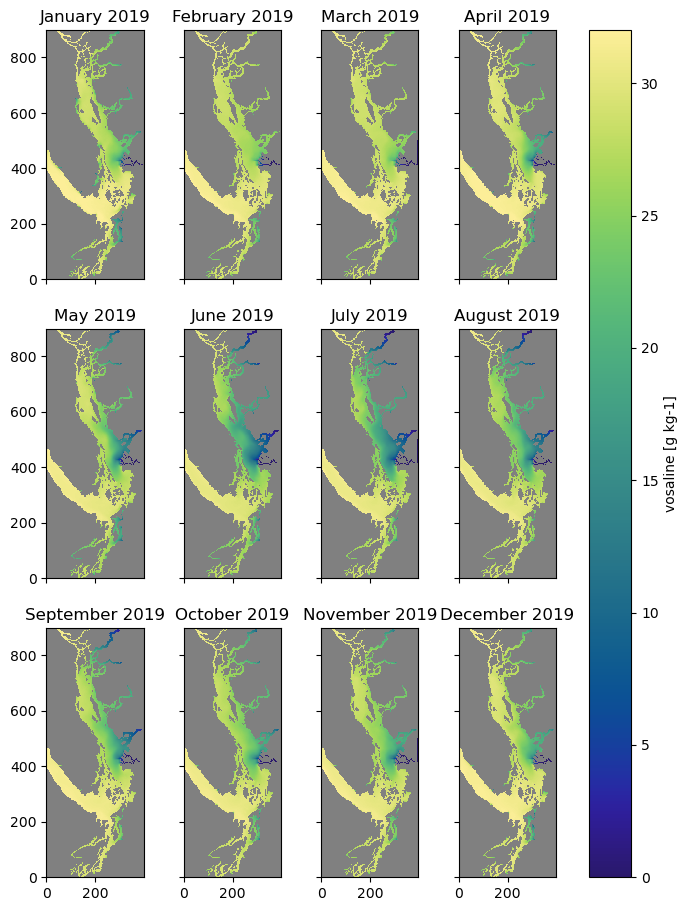

In [18]:
plot_field_12_months_slice(0, 0, 'vosaline', cm.haline, phys_mon, tmask)

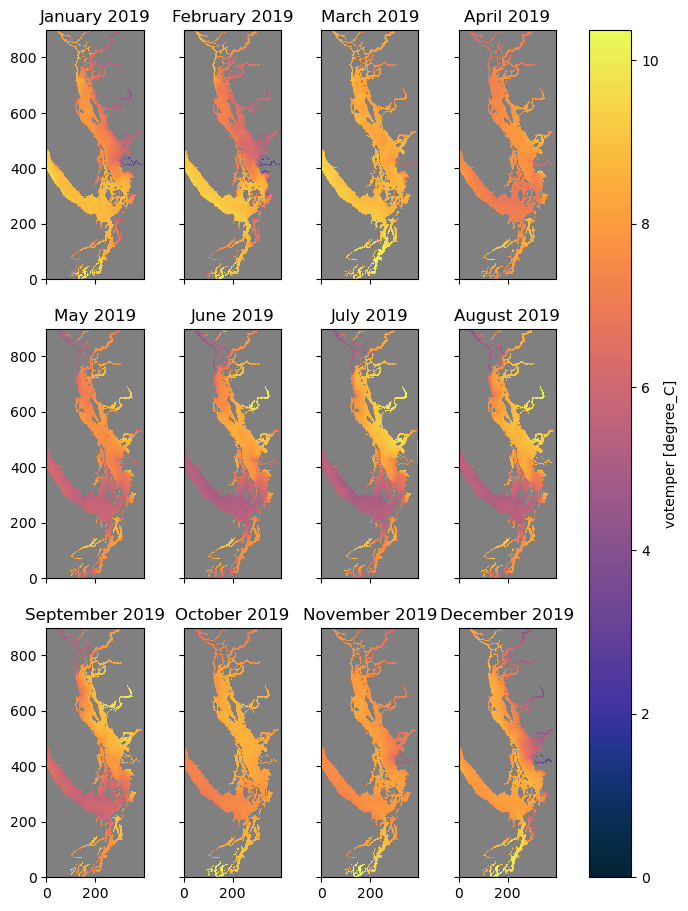

In [19]:
plot_field_12_months_slice(0, 0, 'votemper', cm.thermal, phys_mon, tmask)

### Depth-avg

In [ ]:
### need to use dask clusters for this

## Dye Fields

### Slice

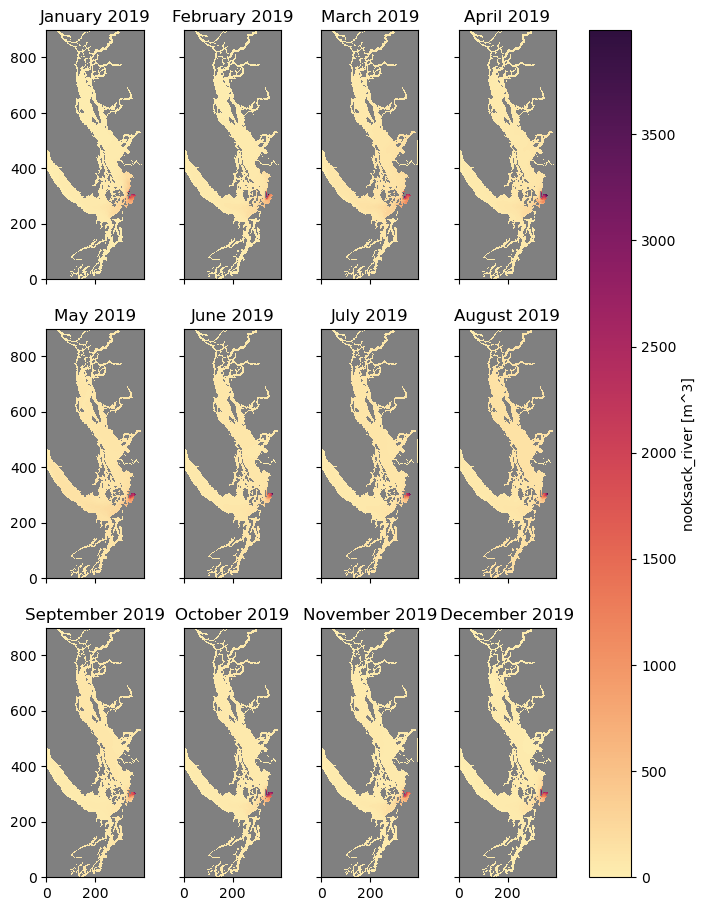

In [7]:
plot_field_12_months_slice(5, 5, 'nooksack_river', cm.matter, vol_mon, tmask)

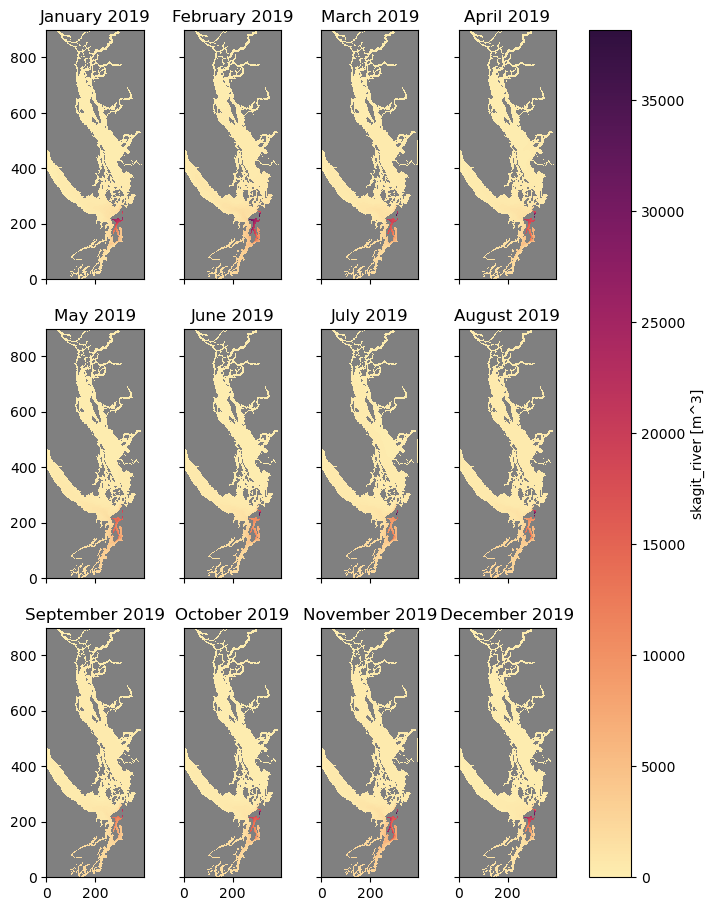

In [8]:
plot_field_12_months_slice(5, 5, 'skagit_river', cm.matter, vol_mon, tmask)

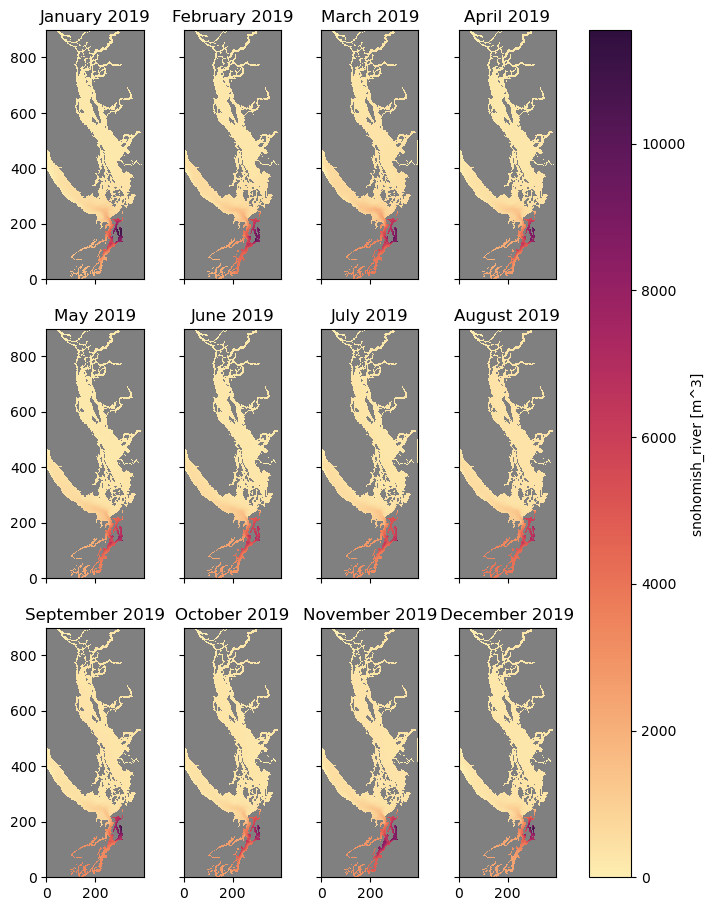

In [9]:
plot_field_12_months_slice(5, 5, 'snohomish_river', cm.matter, vol_mon, tmask)

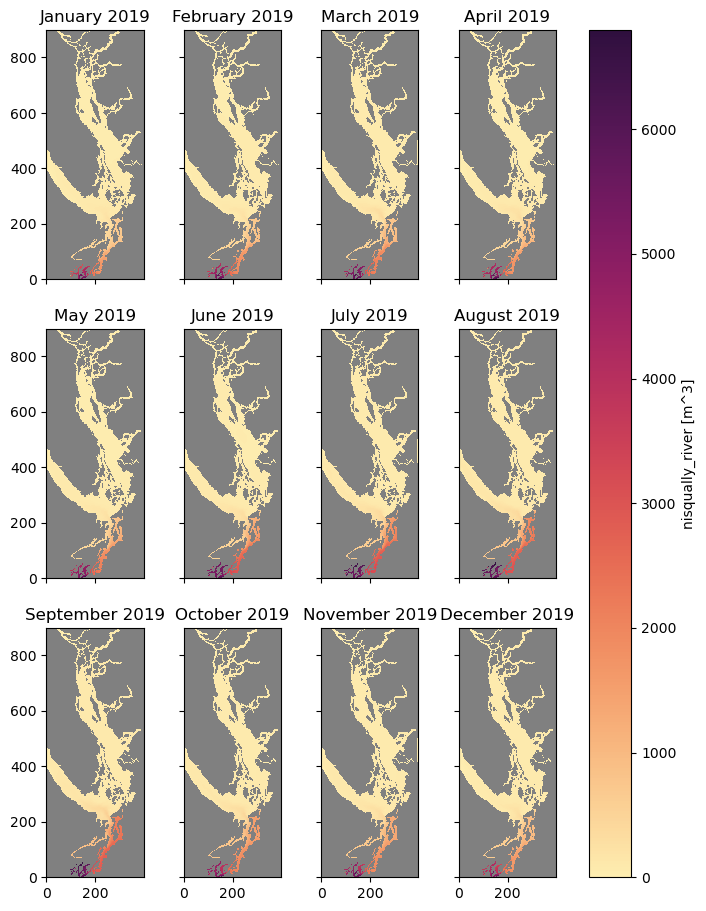

In [10]:
plot_field_12_months_slice(5, 5, 'nisqually_river', cm.matter, vol_mon, tmask)

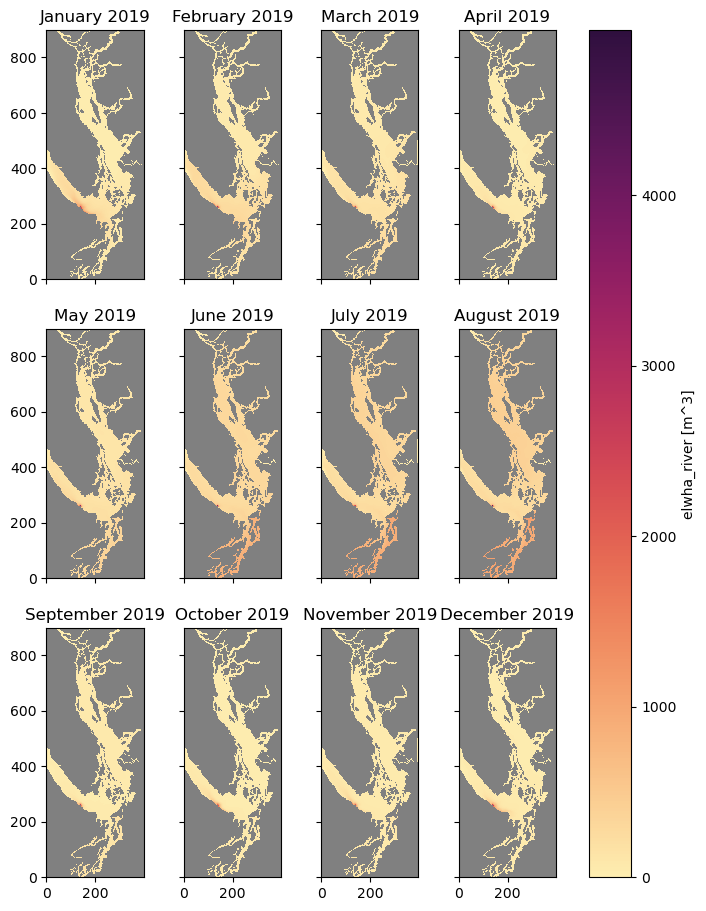

In [11]:
plot_field_12_months_slice(5, 5, 'elwha_river', cm.matter, vol_mon, tmask)

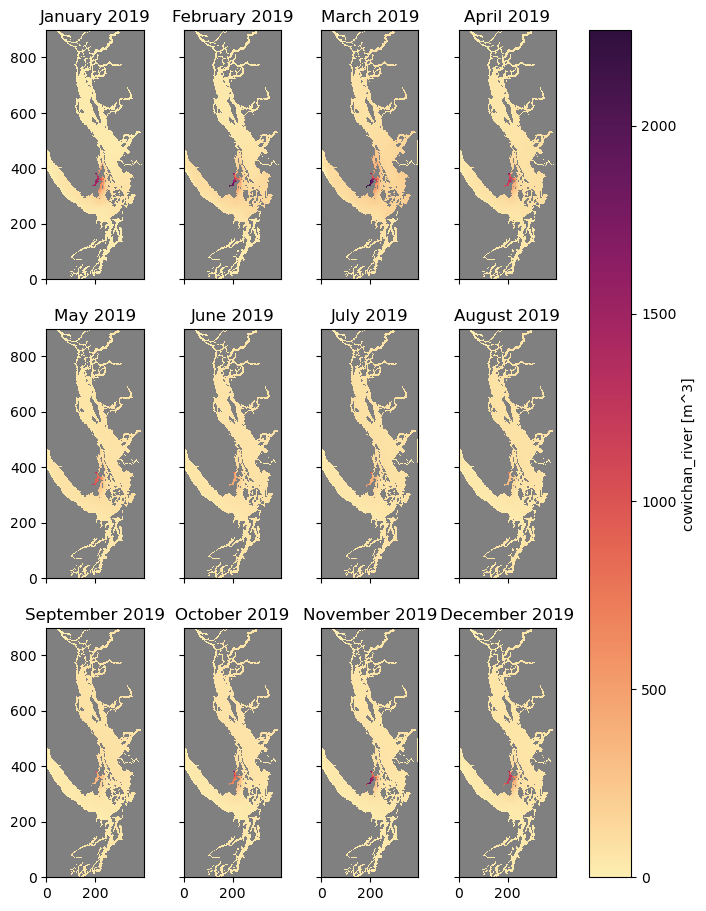

In [12]:
plot_field_12_months_slice(5, 5, 'cowichan_river', cm.matter, vol_mon, tmask)

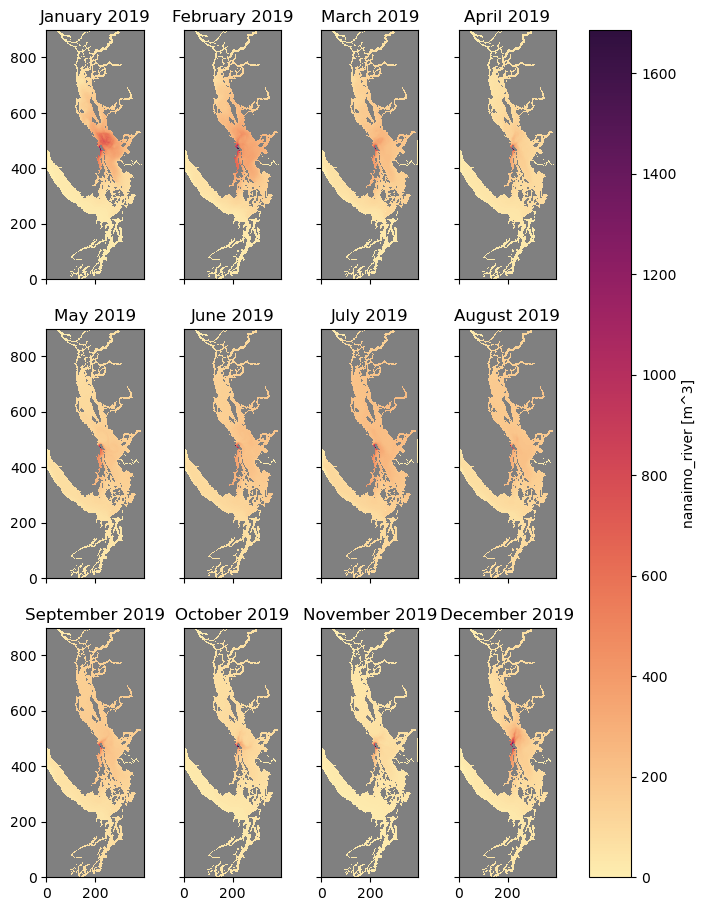

In [13]:
plot_field_12_months_slice(5, 5, 'nanaimo_river', cm.matter, vol_mon, tmask)

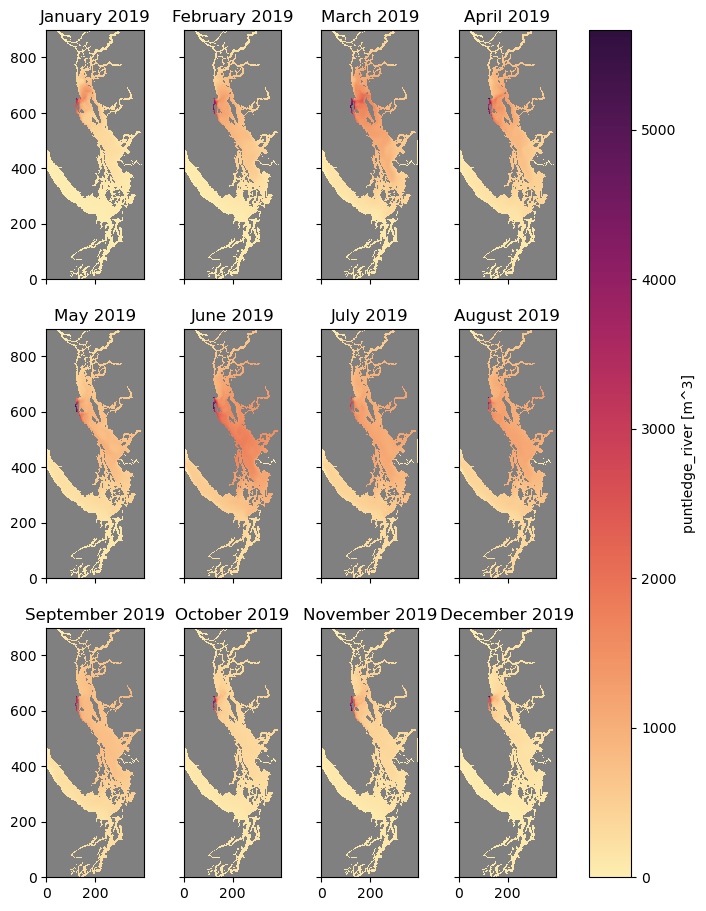

In [14]:
plot_field_12_months_slice(5, 5, 'puntledge_river', cm.matter, vol_mon, tmask)

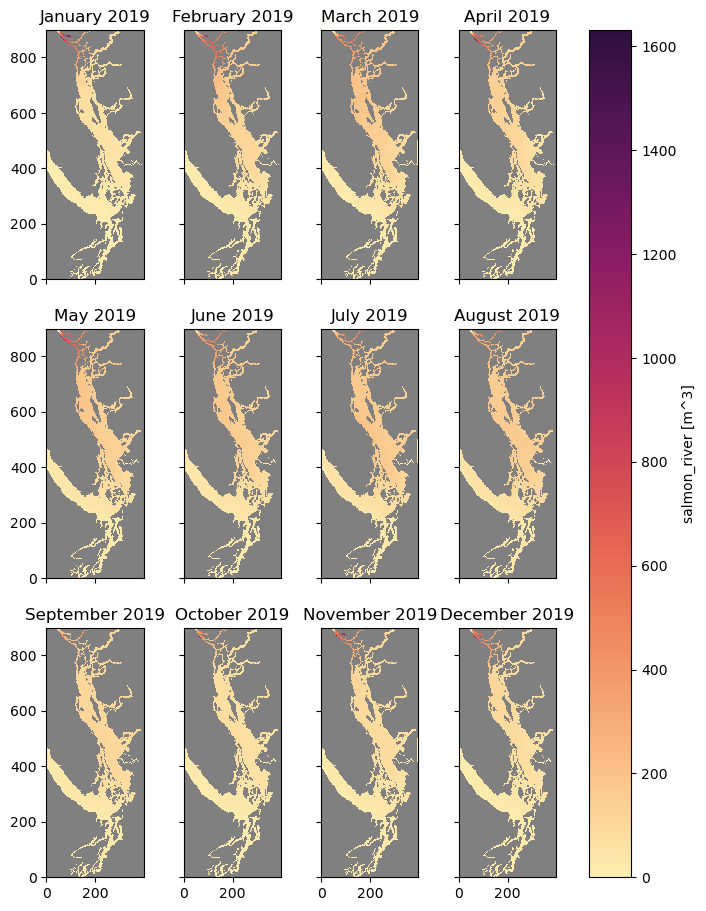

In [15]:
plot_field_12_months_slice(5, 5, 'salmon_river', cm.matter, vol_mon, tmask)

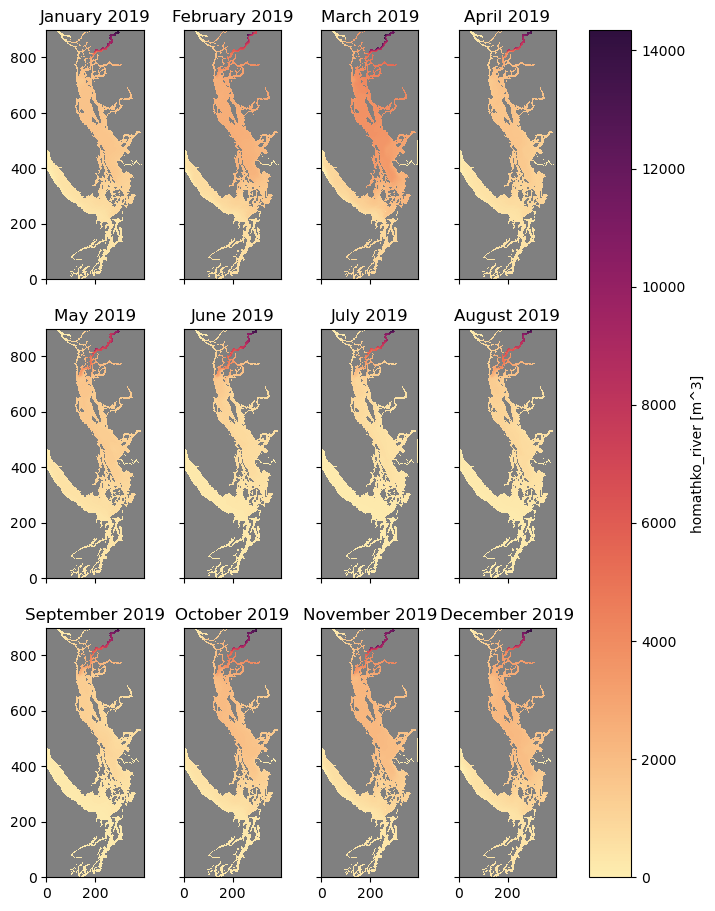

In [16]:
plot_field_12_months_slice(5, 5, 'homathko_river', cm.matter, vol_mon, tmask)

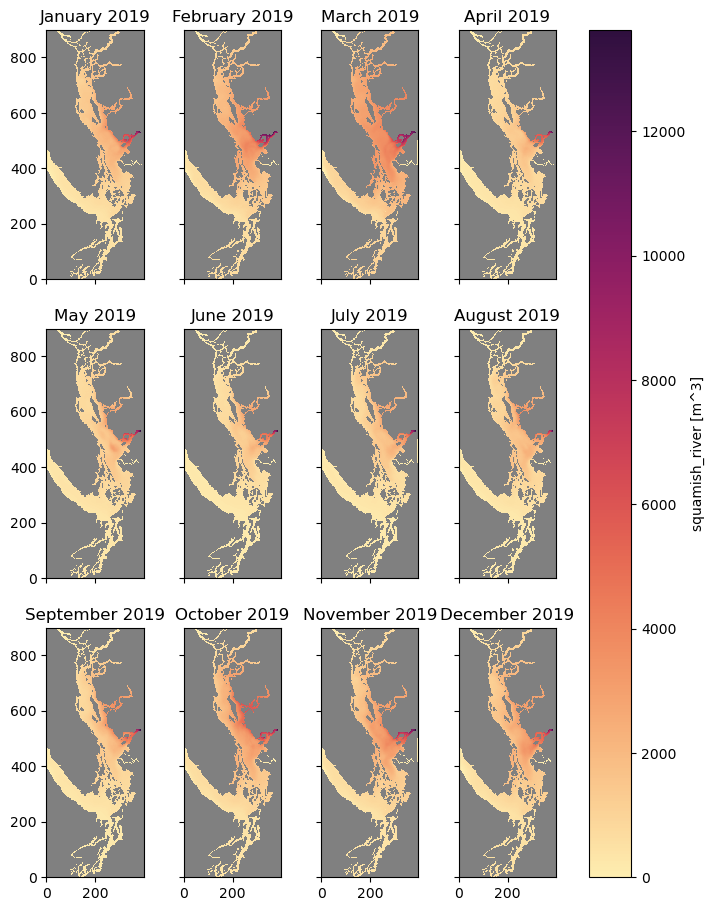

In [17]:
plot_field_12_months_slice(5, 5, 'squamish_river', cm.matter, vol_mon, tmask)

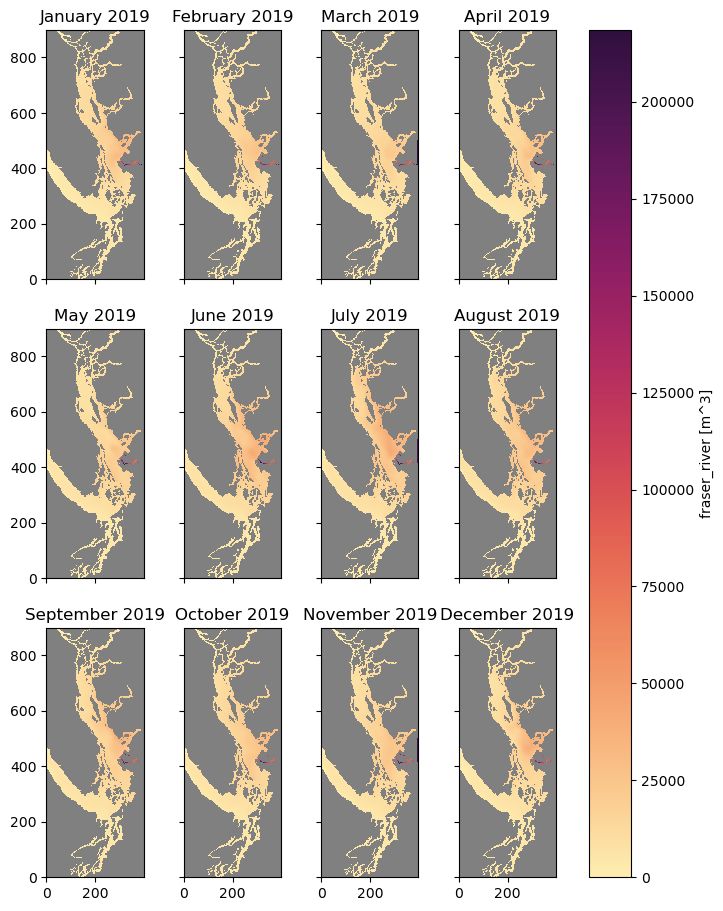

In [18]:
plot_field_12_months_slice(5, 5, 'fraser_river', cm.matter, vol_mon, tmask)

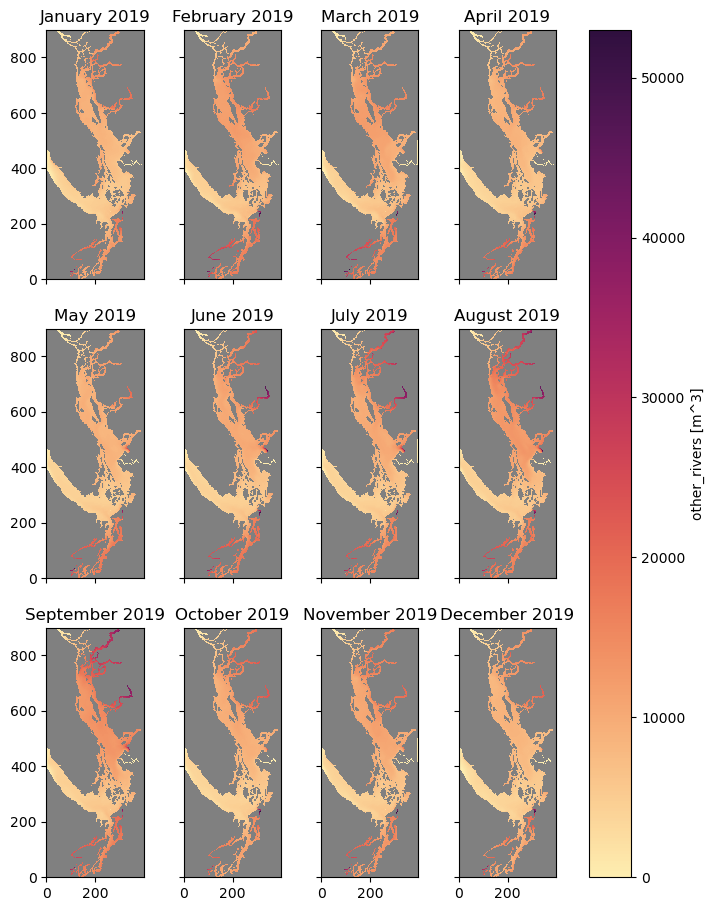

In [19]:
plot_field_12_months_slice(5, 5, 'other_rivers', cm.matter, vol_mon, tmask)

### Sum

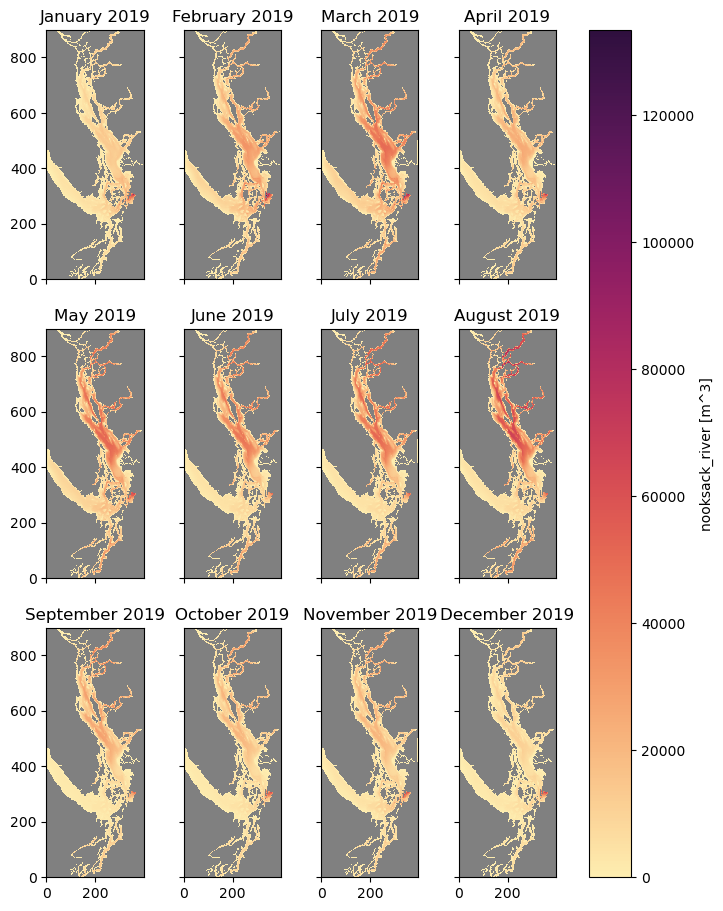

In [20]:
plot_field_12_months_sum('nooksack_river', cm.matter, vol_mon, tmask)

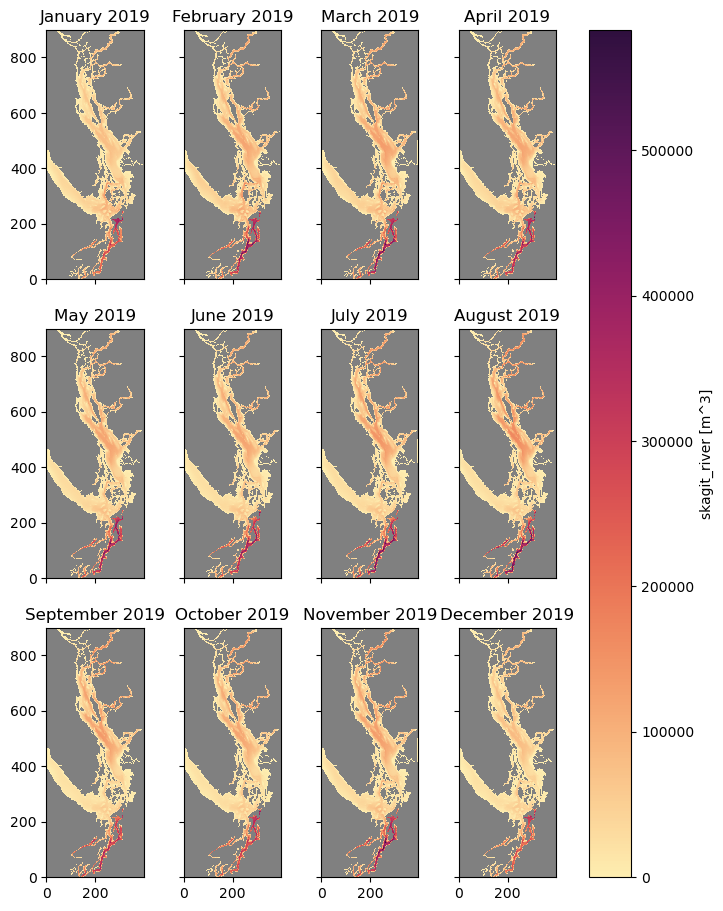

In [21]:
plot_field_12_months_sum('skagit_river', cm.matter, vol_mon, tmask)

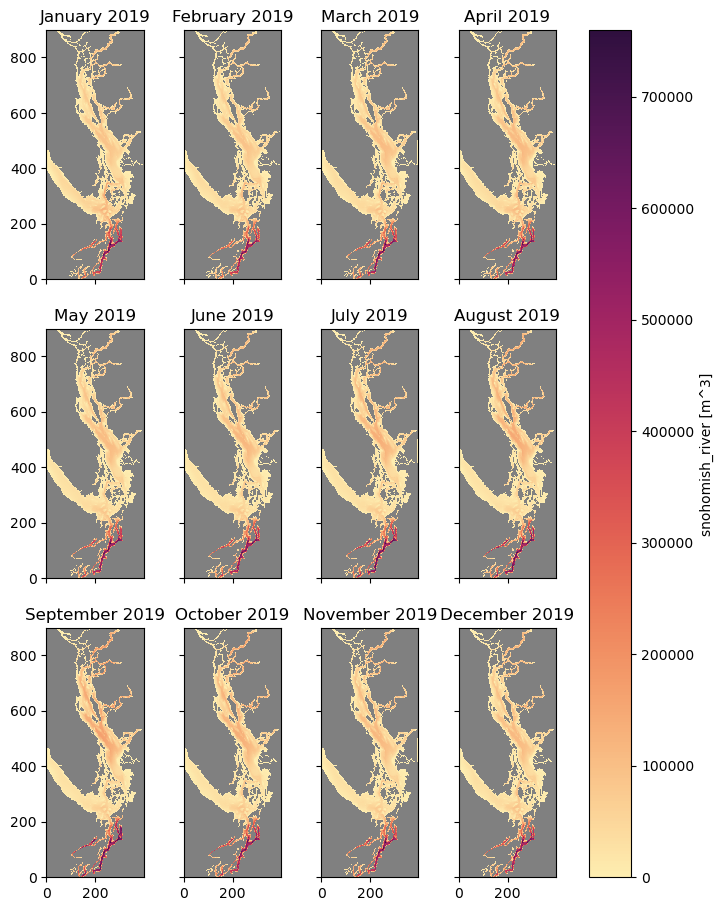

In [22]:
plot_field_12_months_sum('snohomish_river', cm.matter, vol_mon, tmask)

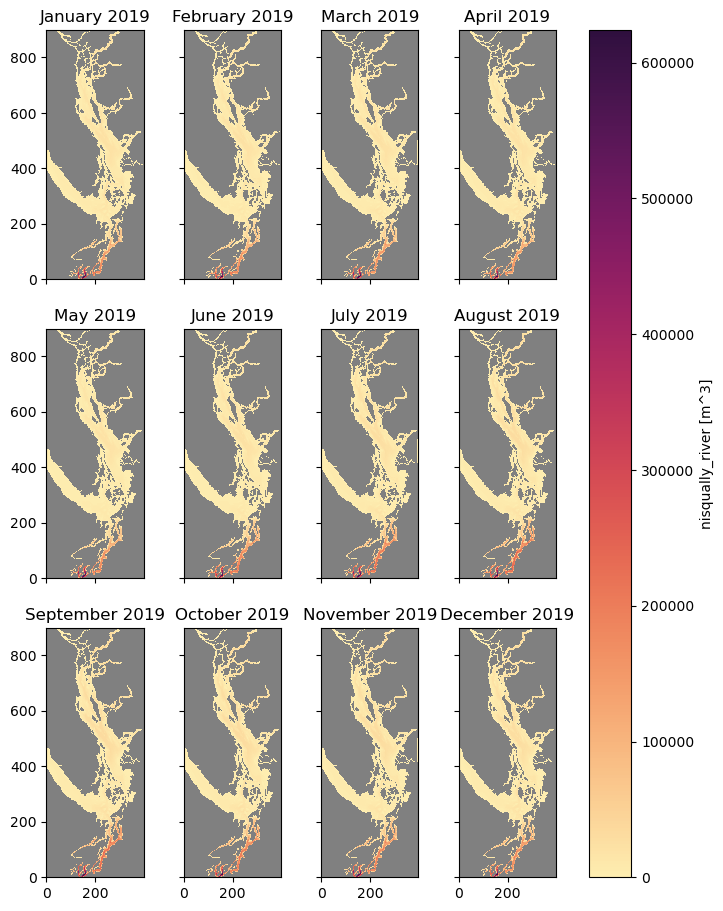

In [23]:
plot_field_12_months_sum('nisqually_river', cm.matter, vol_mon, tmask)

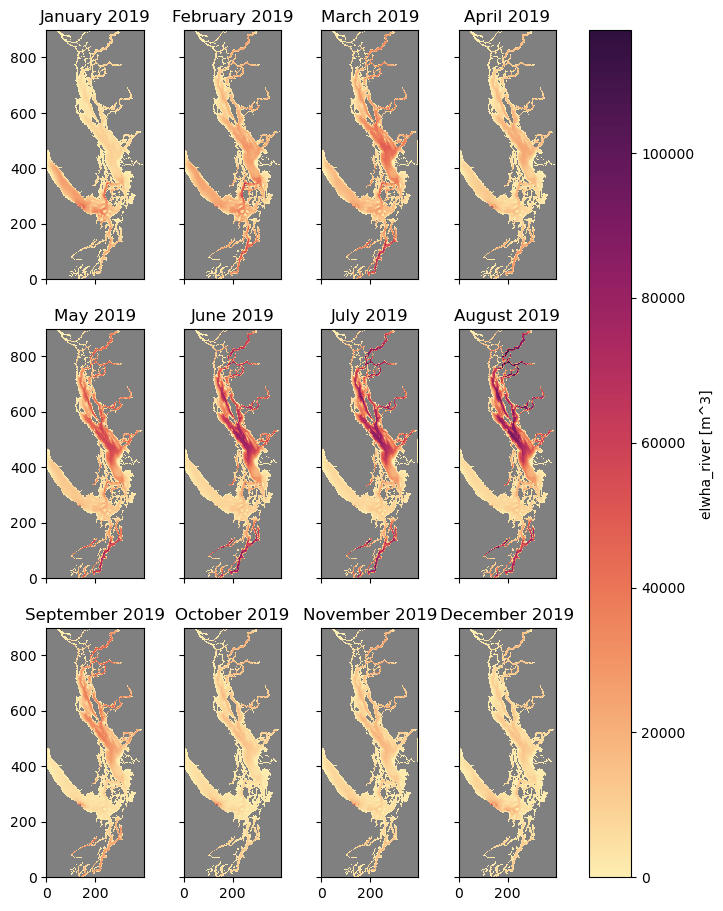

In [24]:
plot_field_12_months_sum('elwha_river', cm.matter, vol_mon, tmask)

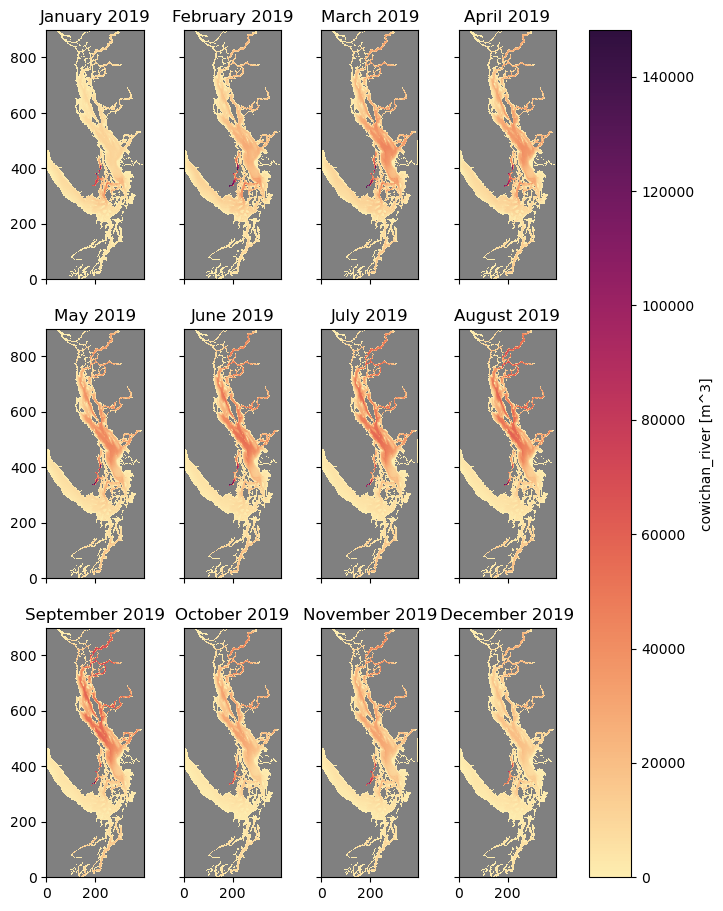

In [25]:
plot_field_12_months_sum('cowichan_river', cm.matter, vol_mon, tmask)

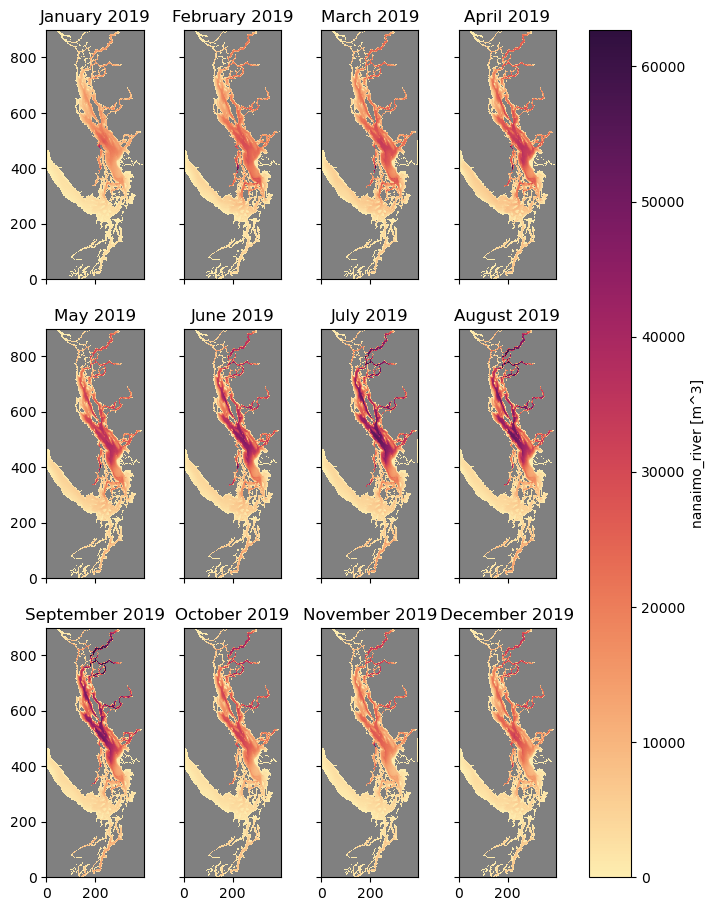

In [26]:
plot_field_12_months_sum('nanaimo_river', cm.matter, vol_mon, tmask)

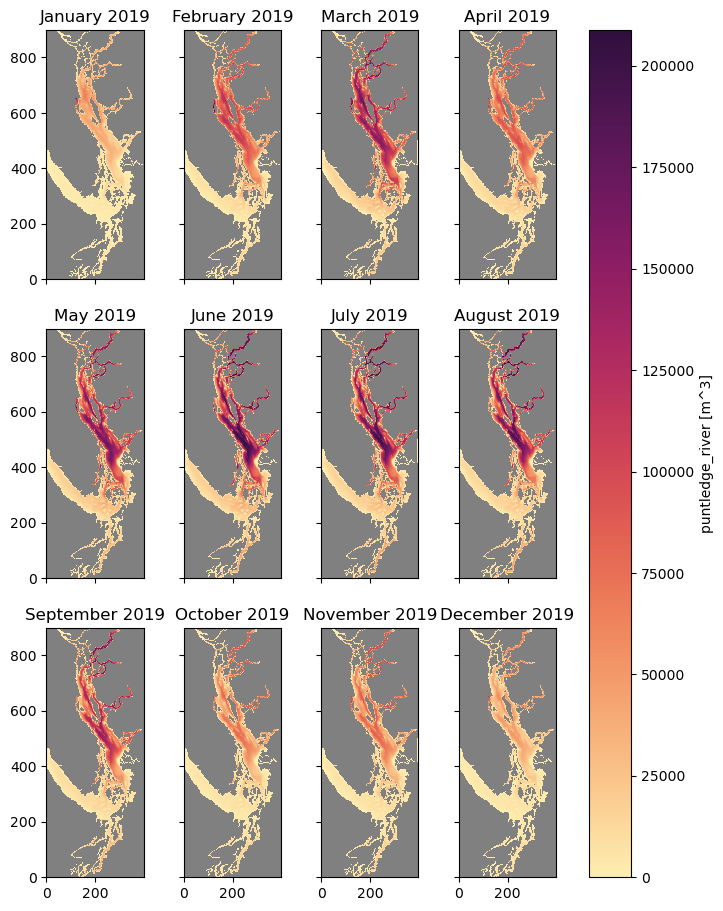

In [27]:
plot_field_12_months_sum('puntledge_river', cm.matter, vol_mon, tmask)

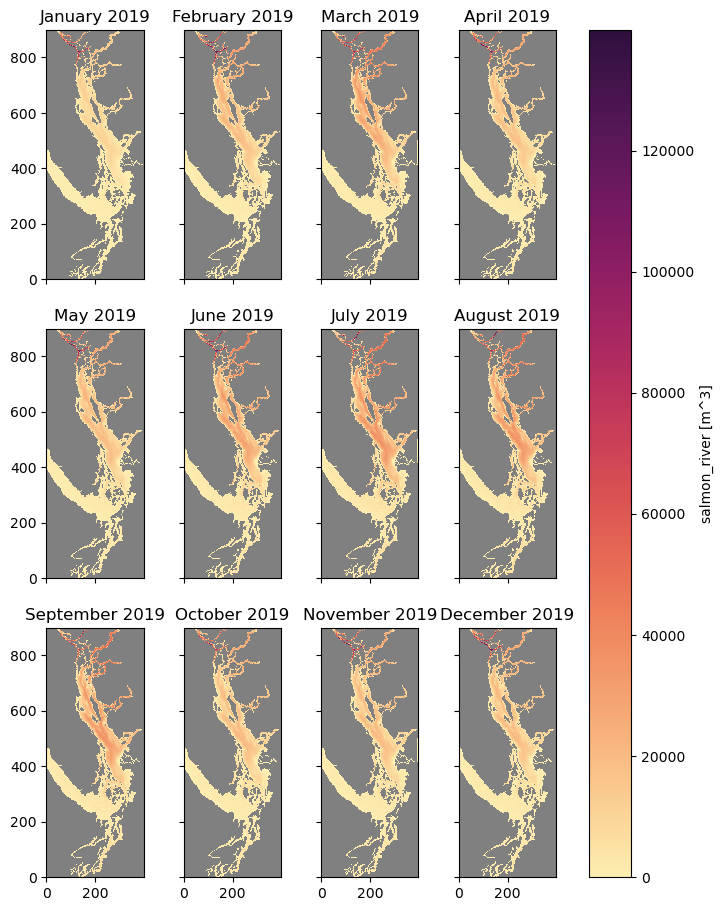

In [28]:
plot_field_12_months_sum('salmon_river', cm.matter, vol_mon, tmask)

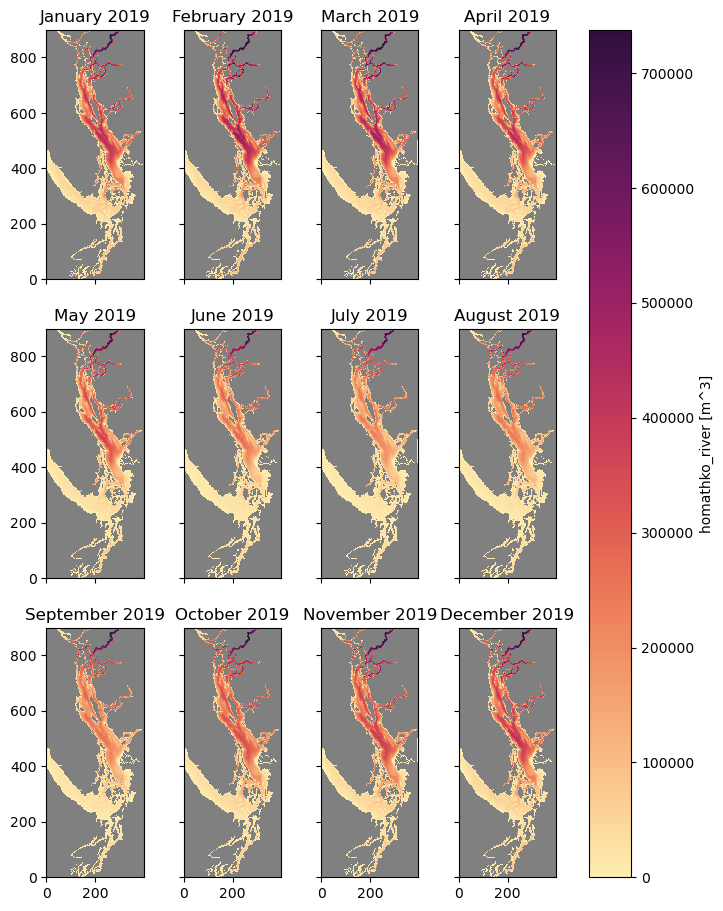

In [29]:
plot_field_12_months_sum('homathko_river', cm.matter, vol_mon, tmask)

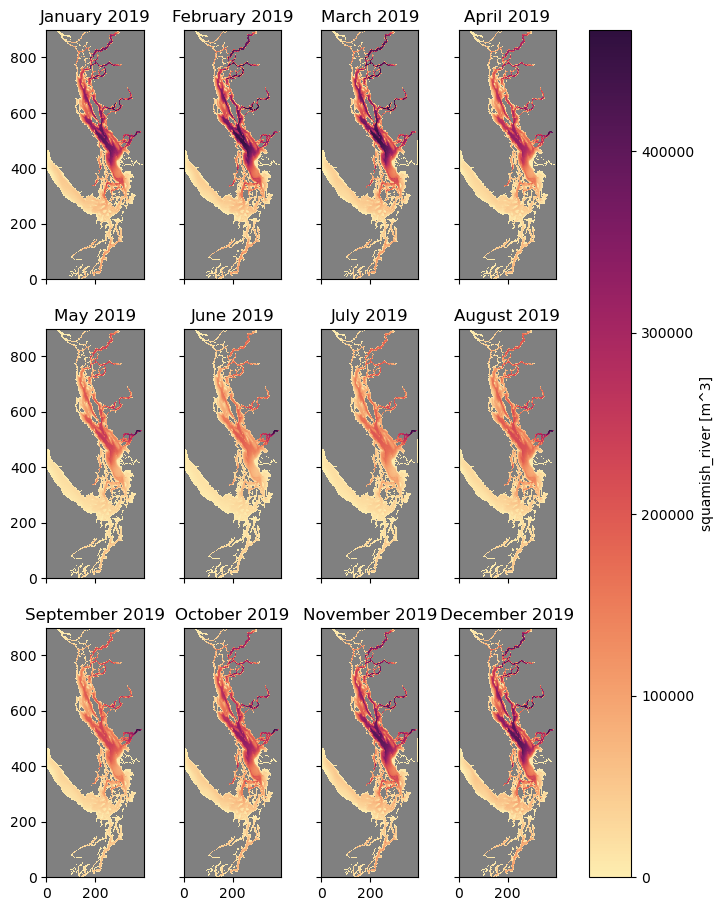

In [30]:
plot_field_12_months_sum('squamish_river', cm.matter, vol_mon, tmask)

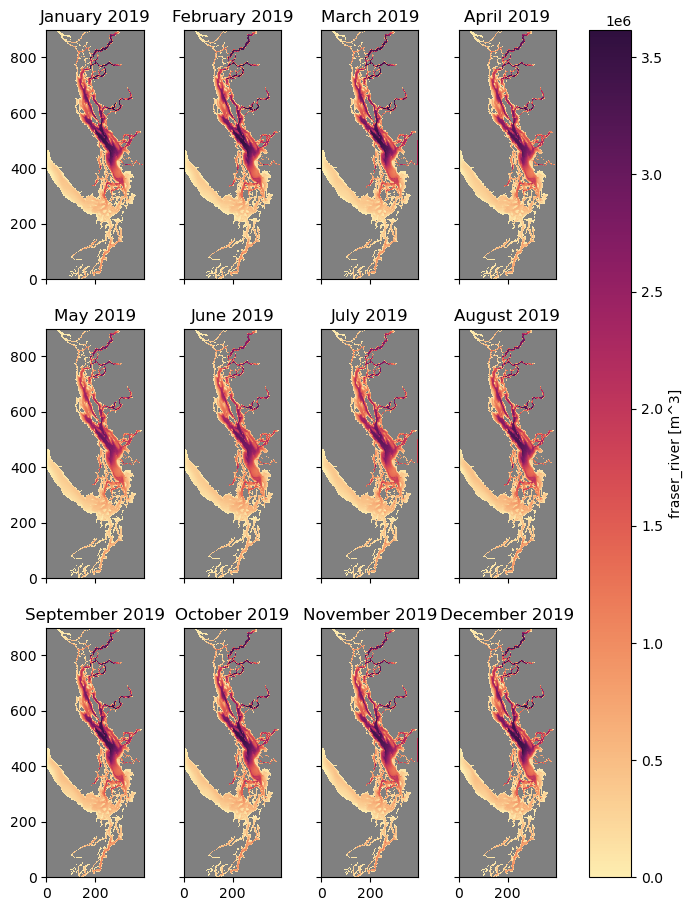

In [31]:
plot_field_12_months_sum('fraser_river', cm.matter, vol_mon, tmask)

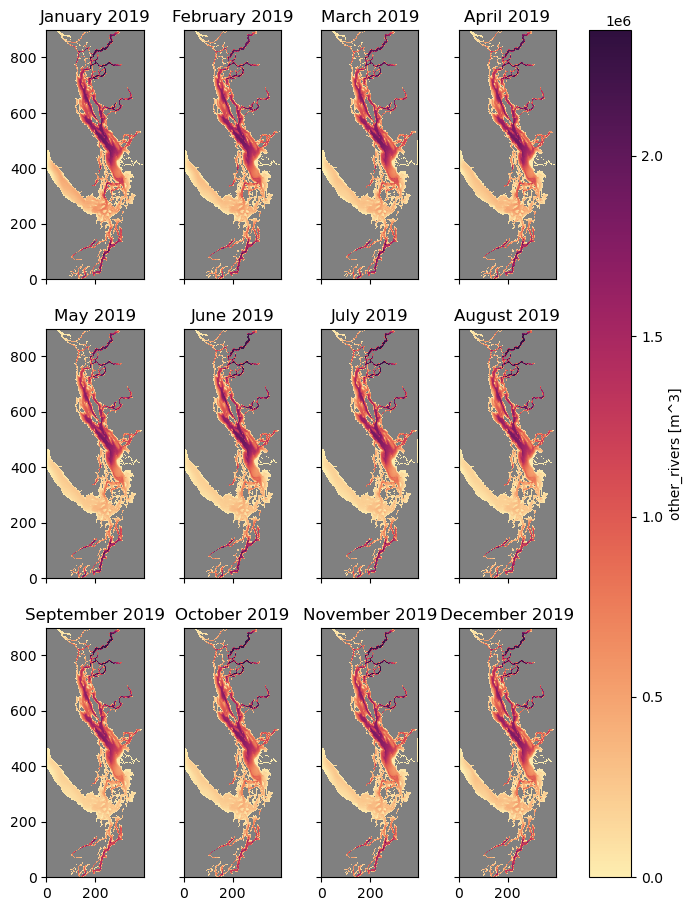

In [32]:
plot_field_12_months_sum('other_rivers', cm.matter, vol_mon, tmask)